## Stochastic gradient descent for logistic regression

### Question C

In [10]:
# import stochastic gradient descent functions
source('~/Box Sync/PhDCourses/SDS385Statistical_models_for_big_data/SDS385/solutions/exercises02/stochastic_gradient_descent.R')

In [11]:
# generate simulated data
set.seed(666)
x1 = rnorm(1000)  # some continuous variables 
x2 = rnorm(1000)
x = cbind(as.matrix(x1), as.matrix(x2))
x= cbind(x, rep(1,1000))  # add one column for intercept
z = 1 + 2*x[ ,1] + 3*x[ ,2]  # linear combination with a bias
prob = 1/(1+exp(-z))  # pass through an inv-logit function
y = as.matrix(rbinom(1000,1,prob))

In [12]:
# experiments for SGD with constant step size
l.total.df = data.frame()
l.weighted.df = data.frame()
l.average.df = data.frame()
betas <- matrix(2, 3, 1)  # initial betas
steps <- c(0.001, 0.01, 0.1, 1)  # different step sizes
colors <- c('black', 'blue', 'green', 'red')
max.iter = 20000
for (i in 1:length(steps)) {
    betas.sgd.c <- SGD.constant.stepsize(x, y, betas, step.size=steps[i], 
                                         max.iter=max.iter, replace=F, 
                                         lambda=0.2)
    betas.tracking <- betas.sgd.c[[1]]  # tracking betas
    l.total.tracking <- betas.sgd.c[[2]]  # tracking l(beta)
    l.weighted.tracking <- betas.sgd.c[[3]]  # tracking weighted average l(beta)
    l.average.tracking <- betas.sgd.c[[4]]  # tracking average l(beta)
    l.total.df = rbind(l.total.df, l.total.tracking)
    l.weighted.df = rbind(l.weighted.df, l.weighted.tracking)
    l.average.df = rbind(l.average.df, l.average.tracking)
}

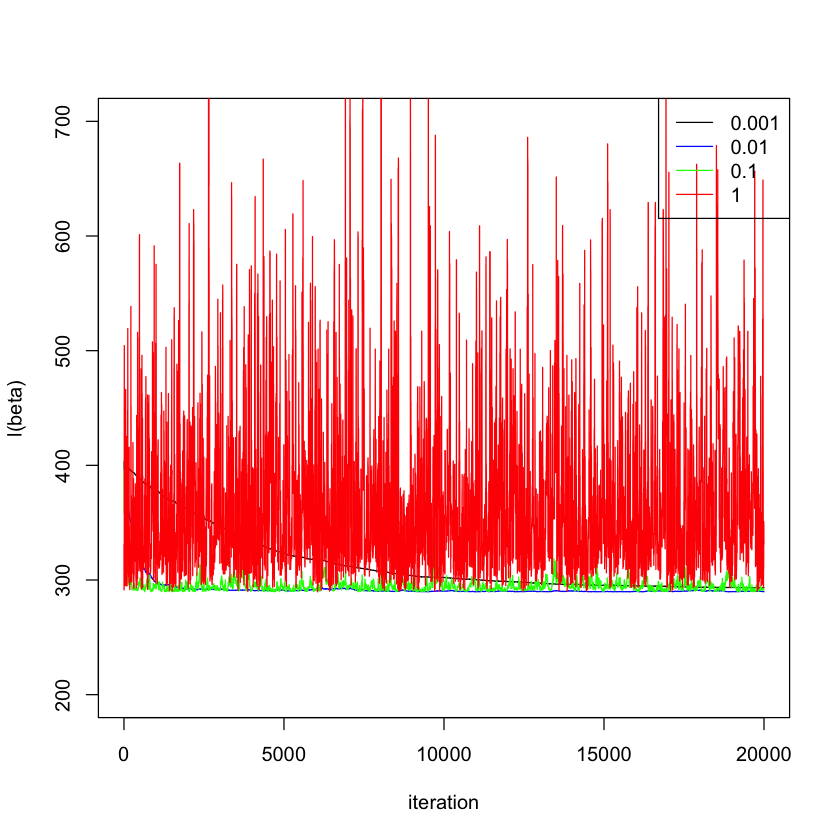

In [13]:
# plot l(beta)
plot(1:max.iter, l.total.df[1,], type='l', col='black', xlab='iteration',ylab='l(beta)', ylim=c(200,700))
lines(1:max.iter, l.total.df[2,], col='blue')
lines(1:max.iter, l.total.df[3,], col='green')
lines(1:max.iter, l.total.df[4,], col='red')
legend('topright', legend=steps, lty=c(1,1), col=c('black', 'blue', 'green', 'red'))

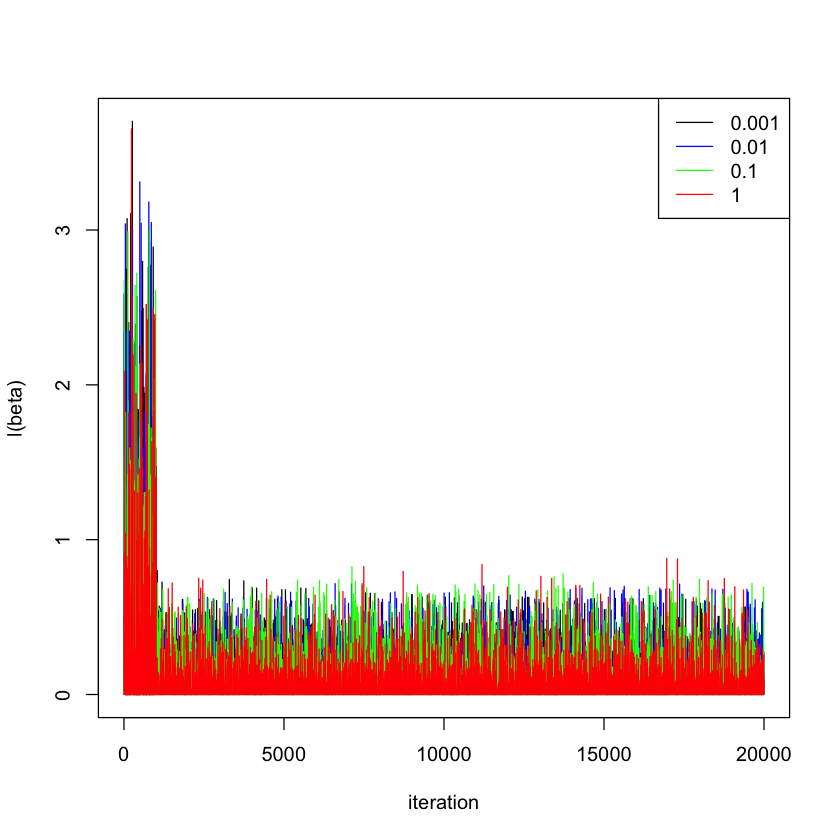

In [14]:
# plot weighted average l(beta)
plot(1:max.iter, l.weighted.df[1,], type='l', col='black', xlab='iteration',ylab='l(beta)')
lines(1:max.iter, l.weighted.df[2,], col='blue')
lines(1:max.iter, l.weighted.df[3,], col='green')
lines(1:max.iter, l.weighted.df[4,], col='red')
legend('topright', legend=steps, lty=c(1,1), col=c('black', 'blue', 'green', 'red'))

**NOTE:** Not sure why the exponentially weighted average l(beta) does not converage...

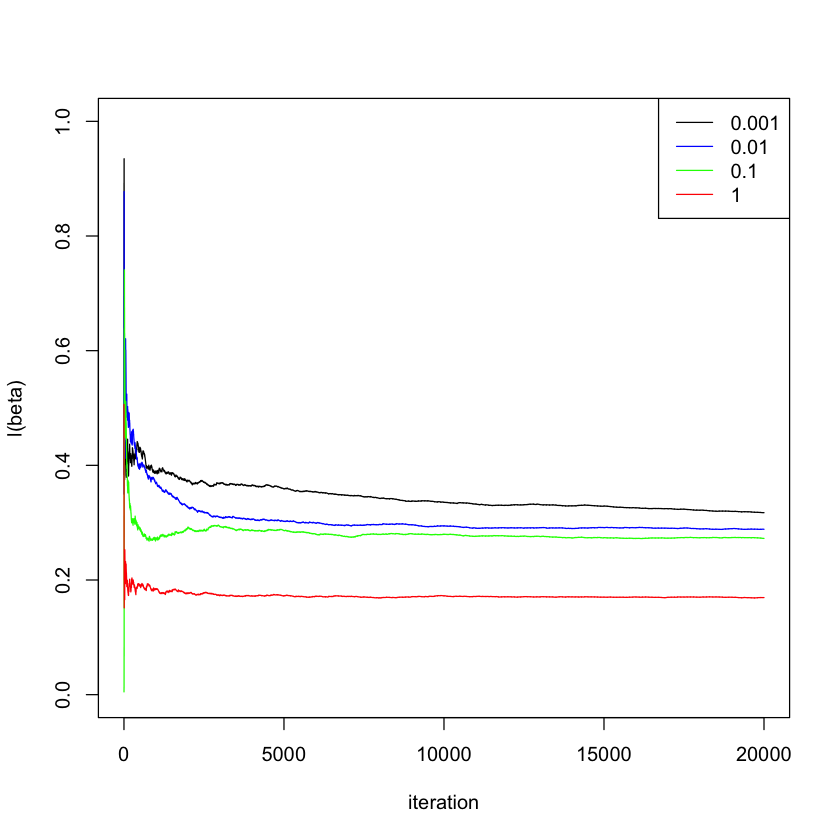

In [15]:
# plot average l(beta)
plot(1:max.iter, l.average.df[1,], type='l', col='black', xlab='iteration',ylab='l(beta)', ylim=c(0,1))
lines(1:max.iter, l.average.df[2,], col='blue')
lines(1:max.iter, l.average.df[3,], col='green')
lines(1:max.iter, l.average.df[4,], col='red')
legend('topright', legend=steps, lty=c(1,1), col=c('black', 'blue', 'green', 'red'))

### Question D

In [ ]:
# experiments for SGD with decaying step size
l.total.df = data.frame()
l.weighted.df = data.frame()
l.average.df = data.frame()
betas = matrix(1, 3, 1)  # initial betas
t0s = c(1,2,1,2)  # try t0=1 and t0=2
Cs = c(1,2,3,4)  # different Cs
alphas = c(0.01, 0.1, 0.5, 1)  # try different alphs
colors <- c('black', 'blue', 'green', 'red')
max.iter = 8000
for (i in 1:length(Cs)) {
    betas.sgd.RM <- SGD.RM.stepsize(x, y, betas, C=Cs[i], t0=t0s[i], alpha=alphas[i], 
                                         max.iter=max.iter, replace=F, 
                                         lambda=0.2)
    betas.tracking <- betas.sgd.RM[[1]]  # tracking betas
    l.total.tracking <- betas.sgd.RM[[2]]  # tracking l(beta)
    l.weighted.tracking <- betas.sgd.RM[[3]]  # tracking weighted average l(beta)
    l.average.tracking <- betas.sgd.RM[[4]]  # tracking average l(beta)
    l.total.df = rbind(l.total.df, l.total.tracking)
    l.weighted.df = rbind(l.weighted.df, l.weighted.tracking)
    l.average.df = rbind(l.average.df, l.average.tracking)
}

In [ ]:
# plot l(beta)
plot(1:max.iter, l.total.df[1,], type='l', col='black', xlab='iteration',ylab='l(beta)', ylim=c(200,700))
lines(1:max.iter, l.total.df[2,], col='blue')
lines(1:max.iter, l.total.df[3,], col='green')
lines(1:max.iter, l.total.df[4,], col='red')
legend('topright', legend=list(c('t0:1','C:1','alpha:0.01'),c('t0:2','C:2','alpha:0.1'),c('t0:1','C:3','alpha:0.5'),c('t0:2','C:4','alpha:1')), lty=c(1,1), col=c('black', 'blue', 'green', 'red'))

In [ ]:
# plot weighted average l(beta)
plot(1:max.iter, l.weighted.df[1,], type='l', col='black', xlab='iteration',ylab='l(beta)')
lines(1:max.iter, l.weighted.df[2,], col='blue')
lines(1:max.iter, l.weighted.df[3,], col='green')
lines(1:max.iter, l.weighted.df[4,], col='red')
legend('topright', legend=list(c('t0:1','C:1','alpha:0.01'),c('t0:2','C:2','alpha:0.1'),c('t0:1','C:3','alpha:0.5'),c('t0:2','C:4','alpha:1')), lty=c(1,1), col=c('black', 'blue', 'green', 'red'))

**NOTE:** Seems like the exponentially weighted average l(beta) does not work correctly...

In [ ]:
# plot average l(beta)
plot(1:max.iter, l.average.df[1,], type='l', col='black', xlab='iteration',ylab='l(beta)', ylim=c(0,0.4))
lines(1:max.iter, l.average.df[2,], col='blue')
lines(1:max.iter, l.average.df[3,], col='green')
lines(1:max.iter, l.average.df[4,], col='red')
legend('topright', legend=list(c('t0:1','C:1','alpha:0.01'),c('t0:2','C:2','alpha:0.1'),c('t0:1','C:3','alpha:0.5'),c('t0:2','C:4','alpha:1')), lty=c(1,1), col=c('black', 'blue', 'green', 'red'))